# Feature Engineering
## 1. Imports

In [8]:
import re
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import numpy as np
from sklearn.metrics import classification_report
import random


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Dataset load

In [9]:
# read the training file and extract genre and plot

input_file = '/content/sample_data/augmented.txt'

genre_plot = []
genres = []
plots = []
count = 0



with open(input_file, 'r', encoding='utf-8') as infile:
    for line in infile:
        count += 1
        print(count)
        # Split the line by tabs
        parts = line.split('\t')

        # Extract genre and plot
        genres.append(parts[2])
        plots.append(parts[4])


# print the extracted data
for i in range(len(plots)):
    print(plots[i])






A saída de streaming foi truncada nas últimas 5000 linhas.
This movie is similar to Romeo and Juliet, a tragic love story about two star-crossed lovers. The movie focuses on the love that blossoms between an Indian student (Vikranth) and a Pakistani girl. The movie is essentially about how they must both fight against forces which oppose them. The movie outlines some of the most complex themes and problems that occur between the two state. The story alternates between Vikranth's parents searching for him, while the flashback of the incidence are portrayed along the way. Eventually, near the end, the Pakistani girl suicides thinking her lover is going to die. However, Vikranth turns up to find her dead. This causes him to break down, eventually psychologically affecting him. As time goes on, Vikranth physical appearance changed to the point where no one recognizes him. The movie ends on a sad note, where his own mother fails to recognize her own son.

Michael Velayudham (Pawan Kalyan) i

# 3. Pre-Processing

In [10]:
#porter_stemmer=PorterStemmer()
lemmatizer = WordNetLemmatizer()

#Function to get WordNet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no tag match

#Function to lemmatize sentence with POS tagging
def processSentence(s):
    words = re.split("\s+", s.lower())  # Lowercasing and tokenizing
    pos_tags = nltk.pos_tag(words)  # Get POS tags for each word
    lemmed_words = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in pos_tags]
    return ' '.join(lemmed_words)

def filter_stopwords(tokens):
    aux = [word for word in tokens if word.isalpha() and word not in stop_words] # watch out for isalpha()
    return ' '.join(aux)

#lemmatization and Lowercasing
lemmed_plots = [processSentence(plot) for plot in plots]

#Tokenizing
tokenized_plots = [nltk.wordpunct_tokenize(sp) for sp in lemmed_plots]

stop_words = set(stopwords.words('english'))

filtered_plots = [filter_stopwords(tp) for tp in tokenized_plots]

print(' '.join(lemmed_plots[0]))
print(' '.join(tokenized_plots[0]))
print(' '.join(filtered_plots[0]))

'''
for i in range(len(plots)):
    print(filtered_plots[i])
'''
print(len(plots))
print(len(lemmed_plots))
print(len(tokenized_plots))
print(len(filtered_plots))


s e k h a r   ( t a r u n )   b e   a   g r a d u a t e   f r o m   i i m   a n d   w o r k   a   a   b u s i n e s s   m a n a g e r   i n   a   f i r m   i n   h y d e r a b a d .   h e   m e e t   a m a r   v a r m a   ( s i v a   b a l a j i )   i n   a   b u s i n e s s   p a r t y   w h o   r u n   a   c o m p a n y   n a m e   v a r m a   i n d u s t r y   i n   g e r m a n y .   w h e n   t h e   p a r t y   b e   o v e r ,   s e k h a r   a c c i d e n t a l l y   k i l l   a m a r   w i t h   h i s   c a r .   s e k h a r ' s   f r i e n d   s u n i l   ( s u n i l )   s a v e   h i m   b y   e r a s e   t h e   e v i d e n c e ,   b u t   s e k h a r   f e e l   g u i l t y   e v e n   a f t e r   s i x   m o n t h s .   h e   g o   t o   g e r m a n y   a l o n g   w i t h   s u n i l   t o   v i s i t   a m a r ' s   f a m i l y .   t h e y   f i n d   t h a t   t h e i r   b u s i n e s s   b e   i n   a   b a d   c o n d i t i o n   a n d   w a n t   t o   h e l p   t h 

# 4. Train Test Split

In [11]:
indices = range(len(filtered_plots))

print(len(filtered_plots))

X_train, X_test, Z_train, Z_test = train_test_split(filtered_plots, genres, test_size=0.1, random_state=33)

labels = np.unique(genres).tolist()

print(labels)

print(len(X_train))
print(len(Z_train))

print(Z_train)



train_vectorizer = TfidfVectorizer(min_df = 2)

X_train_tfidf = train_vectorizer.fit_transform(X_train).toarray()

X_test_tfidf = train_vectorizer.transform(X_test).toarray()

print("==== MultinomialNB ====")
clf = MultinomialNB()

print("Resultados com tfidf")
clf.fit(X_train_tfidf, Z_train)
x_pred=clf.predict(X_test_tfidf)
print(classification_report(y_pred=x_pred, y_true=Z_test, labels = labels, zero_division=1.))

print("==== SVM ====")
clf = svm.LinearSVC()

print("Resultados com tfidf")
clf.fit(X_train_tfidf, Z_train)
x_pred=clf.predict(X_test_tfidf)
print(classification_report(y_pred=x_pred, y_true=Z_test, labels = labels, zero_division=1.))





8869
['action', 'animation', 'comedy', 'crime', 'drama', 'horror', 'romance', 'sci-fi', 'western']
7982
7982
['horror', 'comedy', 'crime', 'animation', 'romance', 'drama', 'crime', 'animation', 'comedy', 'comedy', 'action', 'comedy', 'western', 'sci-fi', 'sci-fi', 'sci-fi', 'action', 'action', 'comedy', 'horror', 'crime', 'action', 'western', 'animation', 'action', 'drama', 'romance', 'comedy', 'animation', 'animation', 'comedy', 'romance', 'crime', 'western', 'western', 'western', 'horror', 'horror', 'horror', 'sci-fi', 'western', 'comedy', 'horror', 'western', 'drama', 'drama', 'comedy', 'romance', 'horror', 'comedy', 'romance', 'sci-fi', 'crime', 'animation', 'romance', 'horror', 'crime', 'action', 'animation', 'drama', 'animation', 'comedy', 'drama', 'horror', 'animation', 'drama', 'sci-fi', 'romance', 'romance', 'crime', 'comedy', 'drama', 'horror', 'animation', 'horror', 'comedy', 'comedy', 'romance', 'action', 'animation', 'comedy', 'romance', 'romance', 'comedy', 'animation', '

# 5. Balance Test

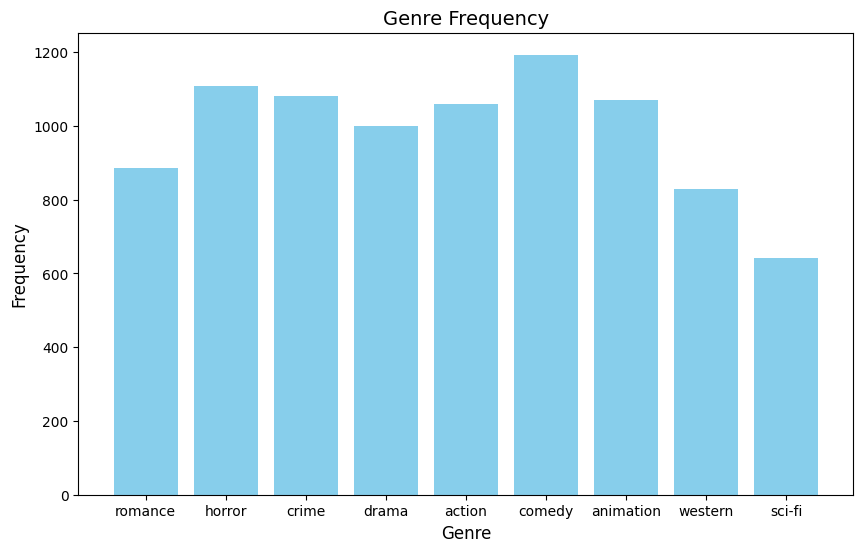

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

#Count the frequency of each genre using Counter
genre_counts = Counter(genres)

#Extract genre names and their respective counts
labels = list(genre_counts.keys())
counts = list(genre_counts.values())

#Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')

#Add titles and labels
plt.title('Genre Frequency', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

#Show the plot
plt.show()